In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

In [13]:
def generate_data(n):
    d = 100
    w = np.zeros(d)
    for i in range(0,10):
        w[i] = 1.0
    x0 = np.ones((n,1))
    trainx = np.random.normal(size=(n,d))
    e = np.random.random(size=(n))
    trainy = np.dot(trainx, w) + e
    trainx =np.concatenate((x0,trainx), axis=1)
    
    return trainx, trainy

In [14]:
train_x, train_y = generate_data(200)
print(train_x.shape, train_y.shape)

(200, 101) (200,)


In [3]:
y = [10,20,30,40]
x = [[1,2],[3,4],[5,6],[7,8]]
w = [2,3]
c1 = np.matmul(x,w)
c2 = np.square(c1)
c3 = np.square(y-np.matmul(x,w))
print(np.matmul(x,w))
print(y-np.matmul(x,w))
print(np.square(y-np.matmul(x,w)))
print(sum(np.square(y-np.matmul(x,w))))

[ 8 18 28 38]
[2 2 2 2]
[4 4 4 4]
16


In [30]:
def cal_loss(x,y,w,C):
    loss_no_reg = sum(np.square(y-np.matmul(x,w)))
    adjust = C * np.dot(w,w)
    loss = loss_no_reg + adjust
    return loss

In [34]:
def grad_des(x,y,w,C):
    grad = np.zeros(len(w))
    r = y - np.matmul(x,w)
    for i in range(len(w)):
        grad[i] = -2*(np.dot(r,x[:,i])) 
    temp = grad[0]
    grad = grad + 2*C*w
    grad[0] = temp
    return grad

In [46]:
def ridge_regression_GD(x,y,C):
    w = np.zeros(x.shape[1])
    step = 0.001
    num_iter = 1000
    losses = np.zeros(num_iter)
    tol = 2**(-20)
    i = 0
    loss = 100000
    while ((loss > tol) and (i < num_iter)):
        grad = grad_des(x,y,w,C)
        w = w - step * grad
        loss = cal_loss(x,y,w,C)
        losses[i] = loss
        if (loss < losses[i-1]):
            # increase the step size
            step = 2 * step
        else:
            step = 0.5 * step
        i = i+1
    return w[1:], w[0], losses

In [79]:
n = 200
x,y = generate_data(n)
C = 10.0
w,b,losses = ridge_regression_GD(x,y,C)
print('w = ', w[0:20])
print('losses = ', losses[:50])

w =  [ 0.98718111  0.9144269   0.93680998  0.93334465  0.94076401  0.92142846
  0.96827268  0.87623126  0.94433605  0.88303325 -0.00118461 -0.04405764
  0.04456546  0.00523332  0.00802316  0.0237537   0.02546261 -0.03179264
  0.01263963 -0.01915768]
losses =  [ 559.40096315  408.56413384  251.19041907  154.28898811  116.03632929
  134.44875196  188.35186618  127.58202938  225.48278215  205.70375013
 1080.95207661 1357.72935372  117.89581803  121.21116522  107.04673562
  107.11823749  106.93513139  106.93570138  106.93231442  106.93227212
  106.93150013  106.95323922  107.09075277  107.19187936  106.93513056
  106.93905642  106.93457812  106.93519266  106.93504649  106.93527972
  106.93534783  106.93539144  106.93541241  106.93542273  106.93542785
  106.93543041  106.93543168  106.93543231  106.93543263  106.93543279
  106.93543287  106.93543291  106.93543293  106.93543294  106.93543295
  106.93543295  106.93543295  106.93543295  106.93543295  106.93543295]


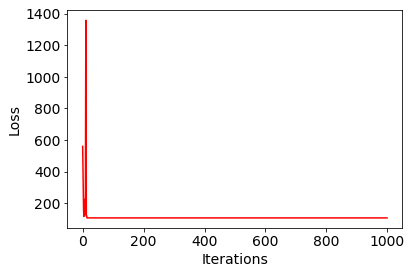

In [80]:
plt.plot(losses, 'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

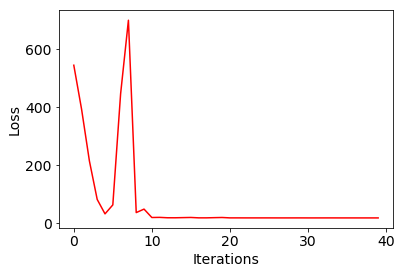

In [49]:
plt.plot(losses[:40], 'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

In [53]:
losses[0:50]

array([544.9214637 , 392.84999487, 214.92826696,  82.17810194,
        32.50930189,  63.3545494 , 446.58462879, 699.96714796,
        36.90775528,  48.88180911,  19.97002576,  20.40426967,
        19.07853021,  19.01566543,  19.5826979 ,  20.10646239,
        18.78477323,  18.77467622,  19.4368801 ,  20.0009356 ,
        18.66182295,  18.67281164,  18.60637351,  18.59554518,
        18.6080903 ,  18.62844419,  18.56441983,  18.56033919,
        18.58436002,  18.60921572,  18.54550271,  18.5444581 ,
        18.57405492,  18.60129237,  18.5369477 ,  18.53729828,
        18.53385066,  18.53308934,  18.5331075 ,  18.53411172,
        18.53086774,  18.53059105,  18.53141906,  18.53273828,
        18.52955041,  18.52949512,  18.53070907,  18.53218822,
        18.52898796,  18.52903328])

In [54]:
2**(-20)

9.5367431640625e-07

In [62]:
def compute_mse(w,b,x,y,n):
    residuals = y - (np.dot(x,w)+b)
    return np.dot(residuals,residuals)/n

In [74]:
n = 200
x,y = generate_data(n)
C = 10.0
w,b,losses = ridge_regression_GD(x,y,C)

x_data = x[:,1:]
regr = linear_model.Ridge(alpha=C)
regr.fit(x_data,y)

print("MSE of gradient descent solver: ", compute_mse(w,b,x_data,y,n))
print("MSE of built-in solver: ", mean_squared_error(regr.predict(x_data),y))
print("Distance between w-coefficients: ", np.linalg.norm(w-regr.coef_))

MSE of gradient descent solver:  0.07248874979491894
MSE of built-in solver:  0.07256123223459043
Distance between w-coefficients:  0.0033328167022276907


In [75]:
regr.coef_.shape

(100,)

In [76]:
regr.coef_[:20]

array([ 0.91839314,  0.94308506,  0.9504054 ,  0.89138427,  0.92475613,
        0.89660924,  0.90941405,  0.90105446,  0.94732099,  0.97239934,
        0.02611566, -0.02488107,  0.03756228, -0.03869199,  0.05155247,
       -0.06972227, -0.03963925, -0.01436715,  0.04042238,  0.05527831])

In [77]:
w[:20]

array([ 0.9180461 ,  0.9436129 ,  0.95101787,  0.89125854,  0.9251209 ,
        0.89677858,  0.90924103,  0.90094831,  0.94738699,  0.97238768,
        0.02659816, -0.02481201,  0.03796096, -0.03845652,  0.05132057,
       -0.06964347, -0.03982436, -0.0145533 ,  0.04051578,  0.05575456])

In [78]:
losses[200]/200

0.5177144858516904